In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import operator

In [2]:
train=pd.read_csv('train.csv')
validation=pd.read_csv('validation.csv')
test=pd.read_csv('test.csv')

In [3]:
y = train.click
y_validation = validation.click

# 1.Constant Bidding

In [5]:
eval_cons_train = pd.DataFrame(columns=['bid_base','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
best = 0
iteration = 0

for bid_base in np.arange(3,300,3):
    num_click = 0
    flag = True
    Imps = 0
    spend = 0
    iteration += 1
    for i in range(train.shape[0]):
        bid = bid_base
        
        if bid >= train.payprice[i] and flag:
            spend = spend + train.payprice[i]
            if spend > 6250000:
                spend=spend-train.payprice[i]
                flag = False
                break
            num_click = num_click + train.click[i]
            Imps = Imps + 1
    eval_cons_train.loc[iteration,'bid_base'] = bid_base
    eval_cons_train.loc[iteration,'clicks'] = num_click
    eval_cons_train.loc[iteration,'spend'] = spend/1000
    eval_cons_train.loc[iteration,'Imps'] = Imps
    
    if num_click > max_num:
        max_num  = num_click
        max_bid = bid_base
        best = bid_base
        
eval_cons_train['CTR'] = eval_cons_train['clicks']/eval_cons_train['Imps']
eval_cons_train['eCPC'] = eval_cons_train['spend']/eval_cons_train['clicks']
eval_cons_train['CPM'] = eval_cons_train['spend']*1000/eval_cons_train['Imps']

In [6]:
eval_cons_train.iloc[np.where(eval_cons_train.clicks == eval_cons_train.clicks.max())[0]]

,bid_base,Imps,spend,clicks,CTR,eCPC,CPM
8,24,411910,6249.99,134,0.000325314,46.6417,15.1732


In [5]:
eval_cons = pd.DataFrame(columns=['bid_base','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
best = 0
iteration = 0

for bid_base in np.arange(3,300,2):
    num_click = 0
    flag = True
    Imps = 0
    spend = 0
    iteration += 1
    for i in range(validation.shape[0]):
        bid = bid_base
        
        if bid >= validation.payprice[i] and flag:
            spend = spend + validation.payprice[i]
            if spend > 6250000:
                spend = spend - validation.payprice[i]
                flag = False
                break
            num_click = num_click + validation.click[i]
            Imps = Imps + 1
    eval_cons.loc[iteration,'bid_base'] = bid_base
    eval_cons.loc[iteration,'clicks'] = num_click
    eval_cons.loc[iteration,'spend'] = spend/1000
    eval_cons.loc[iteration,'Imps'] = Imps
    
    if num_click > max_num:
        max_num  = num_click
        max_bid = bid_base
        best = bid_base
        
eval_cons['CTR'] = eval_cons['clicks']/eval_cons['Imps']
eval_cons['eCPC'] = eval_cons['spend']/eval_cons['clicks']
eval_cons['CPM'] = eval_cons['spend']*1000/eval_cons['Imps']

In [6]:
eval_cons.iloc[np.where(eval_cons.clicks == eval_cons.clicks.max())[0]]

,bid_base,Imps,spend,clicks,CTR,eCPC,CPM
38,77,146864,6249.99,68,0.000463013,91.9116,42.5563
39,79,145916,6249.96,68,0.000466022,91.9111,42.8326


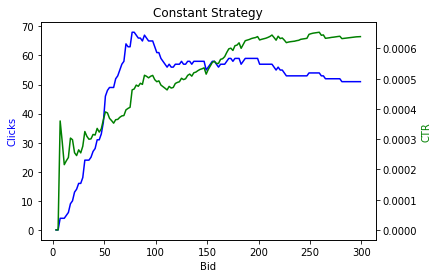

In [9]:
first_line = eval_cons[['bid_base','clicks']].astype(float)
second_line = eval_cons[['bid_base','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(first_line.bid_base,first_line.clicks, color='b')
ax1.set_xlabel('Bid')
ax1.set_ylabel('Clicks', color='b')


ax2 = ax1.twinx()
ax2.plot(second_line.bid_base, second_line.CTR, color='g')
ax2.set_ylabel('CTR', color='g')

plt.title("Constant Strategy")
plt.savefig('constant.png')
plt.show()

# 2.Random Bidding

In [13]:
eval_Random = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0

for lower in np.arange(30,70,5):
    for upper in np.arange(80,310,5):
        
        num_click = 0
        flag = True
        Imps = 0
        spend = 0
        iteration += 1
        for i in range(validation.shape[0]):
            bid = random.randint(lower,upper)
            if bid >= validation.payprice[i] and flag:
                spend = spend + validation.payprice[i]
                if spend > 6250000:
                    spend = spend - validation.payprice[i]
                    flag = False
                    break
                num_click = num_click + validation.click[i]
                Imps = Imps + 1
                
        eval_Random.loc[iteration,'lower'] = lower
        eval_Random.loc[iteration,'upper'] = upper
        eval_Random.loc[iteration,'bid'] = bid
        eval_Random.loc[iteration,'clicks'] = num_click
        eval_Random.loc[iteration,'spend'] = spend/1000
        eval_Random.loc[iteration,'Imps'] = Imps
    
                
        if num_click > max_num:
            max_num = num_click
            #max_bid = bid_base

eval_Random['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']

In [14]:
eval_Random =eval_Random.sort_values(by = 'bid')
eval_Random.iloc[np.where(eval_Random.clicks == eval_Random.clicks.max())[0]]

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
96,40,95,93,160146,6152.62,78,0.000487056,78.8797,38.4188


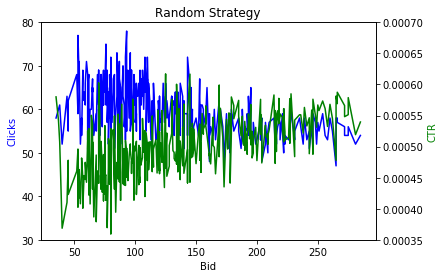

In [15]:
first_line = eval_Random[['bid','clicks']].astype(float)
second_line = eval_Random[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(first_line.bid,first_line.clicks, color='b')
ax1.set_xlabel('Bid')
ax1.set_ylabel('Clicks', color='b')
ax1.set_ylim((30,80))

ax2 = ax1.twinx()
ax2.plot(second_line.bid, second_line.CTR, color='g')
ax2.set_ylabel('CTR', color='g')
ax2.set_ylim((0.00035,0.0007))
plt.title("Random Strategy")
plt.savefig('random.png')
plt.show()